<a href="https://colab.research.google.com/github/alexra99/Data-Mining/blob/main/Data_Mining_101_01_Introducci%C3%B3n_a_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comenzando a manejar Pandas


Vamos a comenzar por los datos que nos proporciona una competición de DrivenData 

[Warm Up: Machine Learning with a Heart](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/)

El conjunto de datos es un clásico del aprendizaje automático. Procede de un estudio de enfermedades cardíacas realizado hace 30 años. 

El estudio, convenientemente anonimizado,  recoge varias mediciones sobre la salud de los pacientes y las estadísticas cardiovasculares.


En primer lugar vamos a estudiar el conjunto de entrenamiento que facilita la competición en este [link](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/data/) (Previa participación en la misma) o mediante el uso del siguiente [enlace](https://drive.google.com/drive/folders/1NfqnfLQqM-gJu5dh0hAhMURO-7_uDHdK?usp=sharing)




## Cargando los datos

En primer lugar leeremos los datos de conjunto de datos de entrenamiento (*train_values.csv*)utilizando las librerías  propias de Google Colab y posteriormente la librería de Python Pandas



In [ ]:
# 0. load data from file
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_values.csv to train_values.csv
User uploaded file "train_values.csv" with length 9591 bytes


La forma de leer ficheros CSV es él método read_csv. A éste método se le pueden especifica entre otros los siguientes parámetros:

*   na_values: carácter que representa los valores perdidos
*   sep: carácter que representa el separador entre vampos 
*  usecols : nombres de las columnas a ser utilizadas. 





In [ ]:
# 0. load data in DataFrame
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = ["patient_id"])



In [ ]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

## Observando los datos


Es importante para conocer los datos leerse primero la descripción de los mismos que se puede obtener en este [enlace](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/)

Para ver las primeras filas se utiliza el método head, pudiendo indicar cuantas filas queremos ver. 

In [ ]:
data.head(10)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1


También existe el método correspondiente para ver los registros del final del dataset

In [ ]:
data.tail(12)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
7zbya5,3,fixed_defect,145,1,0,1,2,233,2.3,1,63,150,0
23gf0e,2,normal,110,1,0,0,2,211,1.8,1,64,144,1
qhz9ye,1,reversible_defect,150,4,0,0,2,270,0.8,1,58,111,1
u25507,1,normal,112,4,1,0,2,212,0.1,1,66,132,1
j9tw19,2,reversible_defect,118,4,0,0,0,219,1.2,1,39,140,0
5o32oi,1,reversible_defect,140,4,0,0,0,299,1.6,1,51,173,1
o63ri2,1,normal,140,4,0,0,0,239,1.2,1,54,160,0
5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1


Para saber las características básicas del Dataset

In [ ]:
data.shape

(180, 13)

Y para saber más estadísticas (medía, máximo, mínimo, desviación típica y percentiles) de cada uno de los **campos numéricos** se utiliza el método *describe()*.

In [ ]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


Aunque hay que tener cuidado con los datos que siendo categóricos están representados numéricamente, como sucede con *slope_of_peak_exercise_st_segment* que es un dato discreto con valores 1,2,3. SI hay alguna duda, podemos consultar que valores distintos tiene la variable dentro del conjunto de datos, seleccionando la columna mediante *[ nombre columna ]* con el método *unique()*

In [ ]:
data['slope_of_peak_exercise_st_segment'].unique()

array([1, 2, 3])

In [ ]:
data.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

Y luego transformar todos aquellos que nos parezcan que van a ser categorías y que puedan sernos útiles para el futuro como categorías. 

Para  las transformaciones de tipo se utiliza *astype*


In [ ]:
data['slope_of_peak_exercise_st_segment'] = data['slope_of_peak_exercise_st_segment'].astype('category')
data['chest_pain_type'] = data['chest_pain_type'].astype('category')
data['sex'] = data['sex'].astype('category')
data['exercise_induced_angina'] =data['exercise_induced_angina'].astype('category')
data.dtypes

slope_of_peak_exercise_st_segment       category
thal                                      object
resting_blood_pressure                     int64
chest_pain_type                         category
num_major_vessels                          int64
fasting_blood_sugar_gt_120_mg_per_dl       int64
resting_ekg_results                        int64
serum_cholesterol_mg_per_dl                int64
oldpeak_eq_st_depression                 float64
sex                                     category
age                                        int64
max_heart_rate_achieved                    int64
exercise_induced_angina                 category
dtype: object

## Seleccionando los datos

Utilizando los [] podemos seleccionar tanto filas como columnas 

In [ ]:
data[50:60]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
3drd48,2,reversible_defect,140,4,2,0,0,311,1.8,1,46,120,1
ejo7p3,1,normal,130,3,1,0,0,315,1.9,1,43,162,0
r7y4i1,1,reversible_defect,130,4,3,1,2,330,1.8,1,63,132,1
mznwxv,2,fixed_defect,130,3,1,1,2,256,0.6,1,56,142,1
27oevk,1,normal,130,4,0,0,2,330,0.0,0,61,169,0
jwqi3k,1,normal,130,3,0,0,0,233,0.4,1,44,179,1
328lkl,2,reversible_defect,110,4,1,0,0,239,2.8,1,54,126,1
tlk9o8,2,reversible_defect,120,4,2,0,0,267,1.8,1,62,99,1
aq2vrq,1,normal,120,2,0,0,0,295,0.0,1,42,162,0


In [ ]:
data[['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved' ]].head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved
patient_id,,,
0z64un,128,308,170
ryoo3j,110,214,158
yt1s1x,125,304,162
l2xjde,152,223,181
oyt4ek,178,270,145


O filtrar por algún criterio concreto

In [ ]:
data[data['resting_blood_pressure'] >= 140].tail() 

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
qhz9ye,1,reversible_defect,150,4,0,0,2,270,0.8,1,58,111,1
5o32oi,1,reversible_defect,140,4,0,0,0,299,1.6,1,51,173,1
o63ri2,1,normal,140,4,0,0,0,239,1.2,1,54,160,0
2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


También podemos **controlar si hay valores perdidos**, que en este caso no lo hay

In [ ]:
data.isnull().values.any()

False

## Manipulando los datos



Una vez hemos seleccionado los datos deseados por ahora, lo siguiente que se necesita es manipular los datos de los que se dispone.  

Una de las cosas más sencillas que podemos hacer es operar con columnas o filas utilizando funciones de agregación (count, sum, mean, median, min, max, prod, std, var).  El resultado de todas estas funciones aplicadas a una línea o es siempre un número. 

Si se aplica una función a un DataFrame se puede especificar si se debe aplicar la función a las filas de cada columna (estableciendo el parametro **axis = 0**,  o se debe aplicar en las columnas de cada fila (**axis = 1**)

In [ ]:
data.max(axis = 0)

thal                                    reversible_defect
resting_blood_pressure                                180
num_major_vessels                                       3
fasting_blood_sugar_gt_120_mg_per_dl                    1
resting_ekg_results                                     2
serum_cholesterol_mg_per_dl                           564
oldpeak_eq_st_depression                              6.2
age                                                    77
max_heart_rate_achieved                               202
dtype: object

Además de estas funciones de agregación, podemos aplicar operaciones sobre todos los valores en
filas, columnas o una selección de ambas.


Lógicamente una operación entre columnas significa que se aplica a cada fila de esa columna y una operación entre filas significa que se aplica a cada columna de esa fila.

In [ ]:
press = data['resting_blood_pressure'] / 10
press.head()

patient_id
0z64un    12.8
ryoo3j    11.0
yt1s1x    12.5
l2xjde    15.2
oyt4ek    17.8
Name: resting_blood_pressure, dtype: float64

También podemos aplicar funciones algo más complejas (logaritmos, raíces cuadradas, etc.) utilizando el método *apply*

In [ ]:
import numpy as np
log_col = data['serum_cholesterol_mg_per_dl'].apply(np.log)
log_col.head()

patient_id
0z64un    5.730100
ryoo3j    5.365976
yt1s1x    5.717028
l2xjde    5.407172
oyt4ek    5.598422
Name: serum_cholesterol_mg_per_dl, dtype: float64

o funciones lambda

In [ ]:
s = data['serum_cholesterol_mg_per_dl']. apply(lambda d: d**2)
s.head ()

patient_id
0z64un    94864
ryoo3j    45796
yt1s1x    92416
l2xjde    49729
oyt4ek    72900
Name: serum_cholesterol_mg_per_dl, dtype: int64

También podemos añadir nuevas variables calculadas a partir de las anteriores

In [ ]:
data['cholesterol_norm'] = data['serum_cholesterol_mg_per_dl'] / data['serum_cholesterol_mg_per_dl'].max()
data.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,cholesterol_norm
patient_id,,,,,,,,,,,,,,
5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,0.450355
2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,0.579787
nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,0.547872
0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0.452128
2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0.356383


Ahora, si queremos quitar esta columna del DataFrame, podemos usar el método  *drop()* eliminandose así las filas (*axis = 0*) o las columnas (*axis = 1*) indicadas. 

Hay que tener en cuenta que en Pandas, todas las funciones que cambian el contenido de un DataFrame normalmente devuelven una copia de los datos modificados, en lugar de sobreescribiendo el DataFrame, con el fin de mantener el DataFrame original. 

Si no quieres mantener los valores antiguos hay que establecer el parámetro *inplace = True* 

In [ ]:
data.drop('cholesterol_norm', axis = 1, inplace = True)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


Podemos añadir también otro tipo de transformaciones de las variables, por ejemplo, **el *corte* que implica el establecer intervalos para los valores de una variable numérica**. En nuestro ejemplo podría ser *age*

In [ ]:
data['age_cat'] = pd.cut(data['age'], 8)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,age_cat
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,"(41.0, 47.0]"
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,"(53.0, 59.0]"
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,"(71.0, 77.0]"
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,"(35.0, 41.0]"
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,"(53.0, 59.0]"


In [ ]:
data['age_cat'].unique()

[(41.0, 47.0], (53.0, 59.0], (71.0, 77.0], (35.0, 41.0], (59.0, 65.0], (47.0, 53.0], (65.0, 71.0], (28.952, 35.0]]
Categories (8, interval[float64]): [(28.952, 35.0] < (35.0, 41.0] < (41.0, 47.0] < (47.0, 53.0] <
                                    (53.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 77.0]]

## Otras Manipulaciones


Muchas veces necesitaremos agrupar los datos según diferentes criterios.  En nuestro ejemplo podría ser la variable *thal* o por *age*. 

Para ello Pandas tiene una función *groupby*

In [ ]:
group = data[['age_cat', 'serum_cholesterol_mg_per_dl']].groupby('age_cat').mean()
group.head(10)



,serum_cholesterol_mg_per_dl
age_cat,
"(28.952, 35.0]",223.500000
"(35.0, 41.0]",222.000000
"(41.0, 47.0]",242.640000
"(47.0, 53.0]",237.125000
"(53.0, 59.0]",250.847826
"(59.0, 65.0]",263.432432
"(65.0, 71.0]",265.000000
"(71.0, 77.0]",286.500000


In [ ]:
counts = data.groupby('age_cat').size ()
counts

age_cat
(28.952, 35.0]     4
(35.0, 41.0]      13
(41.0, 47.0]      25
(47.0, 53.0]      32
(53.0, 59.0]      46
(59.0, 65.0]      37
(65.0, 71.0]      21
(71.0, 77.0]       2
dtype: int64

Otras veces para construir nuestra "Tarjeta de Datos" necesitamos hacer un pivotaje de la tabla que tenemos, es decir, construir un nuevo data set con nuevas filas, columnas y valores que resultan del pivotado de los datos obtenido. Esto es muy común cuando tenemos datos con una granularidad fina y los elementos a estudiar son de más alto nivel. 


In [ ]:
import numpy as np
pivdata = pd.pivot_table(data, values = 'serum_cholesterol_mg_per_dl',
                        index = ['age_cat'], 
                        columns = ['thal'], aggfunc = np.mean)
pivdata


thal,fixed_defect,normal,reversible_defect
age_cat,,,
"(28.952, 35.0]",NaN,207.000000,240.000000
"(35.0, 41.0]",203.0,245.333333,201.833333
"(41.0, 47.0]",NaN,234.952381,283.000000
"(47.0, 53.0]",NaN,233.111111,242.285714
"(53.0, 59.0]",235.5,260.941176,246.440000
"(59.0, 65.0]",222.5,274.111111,256.941176
"(65.0, 71.0]",228.0,254.714286,295.166667
"(71.0, 77.0]",NaN,286.500000,NaN


## Gráficos

Podemos utilizar la librería matplotlib para hacer gráficos a partir de nuestros datos, los originales o los que hemos creado por transformación o pivotaje. 

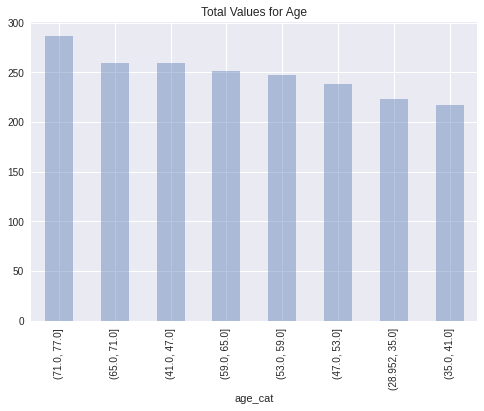

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("seaborn")

mean = pivdata.mean(axis = 1).sort_values(ascending = False)

mean.plot(kind = 'bar', style = 'b', alpha = 0.4,
title = "Total Values for Age")



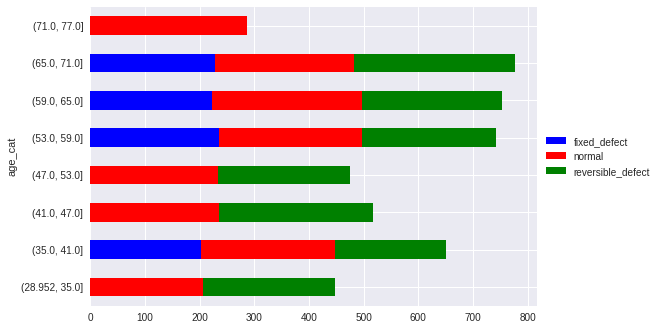

In [ ]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivdata.plot(kind = 'barh',stacked = True , color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))